# 0. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

In [2]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.ensemble import ExtraTreesRegressor

In [4]:
le = LabelEncoder()

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [7]:
!unzip -qq "/content/gdrive/MyDrive/풍력 대회.zip"

replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
import pandas as pd
print(pd.__version__)

1.5.0


In [40]:
#런타임을 다시 초기화 할것
!pip install pandas==1.5.0

Traceback (most recent call last):
  File "<frozen importlib._bootstrap_external>", line 1038, in get_data
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.8/dist-p

In [8]:
import pandas as pd
print(np.__version__)
import pandas as pd
print(pd.__version__)

1.24.2


In [9]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [10]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [11]:
train

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.881600,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.754000,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.822000,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.075800,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.526000,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692
...,...,...,...,...,...,...,...,...,...,...
19270,TRAIN_19270,12.020000,1023.8,81.4,1.6,176.0,0.00,False,0.0,7.047
19271,TRAIN_19271,17.232000,993.2,78.2,2.0,198.0,0.06,False,26.4,3.670
19272,TRAIN_19272,13.748000,999.8,65.0,6.4,260.0,0.36,False,53.0,3.328
19273,TRAIN_19273,19.354000,1019.4,45.4,2.4,120.0,0.06,False,20.0,12.379


In [12]:
test

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,TEST_00000,20.702000,1021.0,76.4,2.0,104.8,0.00,False,23.0
1,TEST_00001,18.673669,1014.4,59.6,2.4,179.2,0.12,False,32.4
2,TEST_00002,29.908000,1020.6,49.6,2.6,78.0,0.60,False,23.0
3,TEST_00003,24.504000,1014.6,61.0,1.8,118.0,0.00,False,15.0
4,TEST_00004,12.590000,1011.4,70.8,1.8,110.0,0.12,False,34.0
...,...,...,...,...,...,...,...,...,...
19270,TEST_19270,25.180000,1020.2,64.8,1.6,122.0,0.00,False,34.0
19271,TEST_19271,16.940000,1022.6,72.4,1.8,245.6,0.00,False,19.0
19272,TEST_19272,9.032000,1036.4,94.4,2.2,219.2,0.00,False,18.0
19273,TEST_19273,15.774000,1021.8,79.0,0.8,182.0,0.00,False,27.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
dtypes: bool(1), float64(7), object(1)
memory usage: 1.2+ MB


결측치는 없음.

# 1. 전처리

<AxesSubplot:xlabel='pressure'>

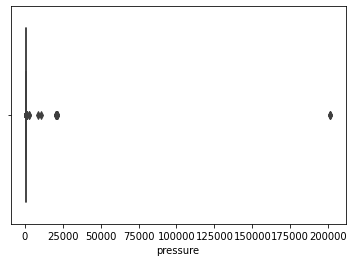

In [15]:
sns.boxplot(x='pressure', data=train)

<AxesSubplot:xlabel='pressure'>

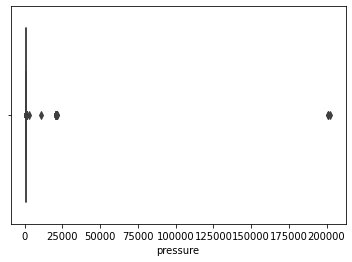

In [16]:
sns.boxplot(x='pressure', data=test)

train과 test에 많은 이상치들이 잡힌다.

이들을 이상치를 제외한 train 데이터의 pressure 칼럼 평균값으로 대체한다.(data leak를 피하기 위해 test역시 train데이터를 기준으로 전처리해줌.)

여기서 기압의 이상치란, 보통 대기상에서 잡히는 기압이 최저 850에서 최대 1200hpa 정도이므로 850이하, 1200이상인 경우 이상치라고 처리한다.

In [17]:
index_1 = train[train['pressure'] <=850].index
for i in index_1:
  train['pressure'][i] = 1016.152817
index_1 = test[test['pressure'] <=850].index
for i in index_1:
  test['pressure'][i] = 1016.152817


index_1 = train[train['pressure'] >=1100].index
for i in index_1:
  train['pressure'][i] = 1016.152817

index_2 = test[test['pressure'] >=1200].index
for i in index_2:
  test['pressure'][i] = 1016.152817

<ipython-input-17-27795b154129>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pressure'][i] = 1016.152817
<ipython-input-17-27795b154129>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pressure'][i] = 1016.152817
<ipython-input-17-27795b154129>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pressure'][i] = 1016.152817
<ipython-input-17-27795b154129>:15: SettingWithCopyWarning: 
A value is trying to be set on

# 2. 특성공학으로 파생변수 만들기

## 2-1. 대기밀도

In [18]:
#대기밀도
import math

def air_density(pressure, temperature, relative_humidity):
    """
    Calculate air density in kg/m^3 given pressure in Pa, temperature in K, and relative humidity as a fraction.
    """
    # Calculate saturation vapor pressure
    e_s = 6.1078 * 10 ** ((7.5 * temperature) / (temperature + 237.3))
    # Calculate vapor pressure
    e = relative_humidity * e_s
    # Calculate dry air pressure
    p_dry = pressure - e
    # Calculate air density
    rho = (p_dry / (287.058 * temperature)) + ((e / (287.058 * temperature)) * (1 - 0.378 * (e / p_dry)))
    return rho
  
train['air_density'] = 0.0
test['air_density'] = 0.0

for i in range(19275):
  train['air_density'][i] = air_density(train['pressure'][i],train['temperature'][i],train['humidity'][i])
for i in range(19275):
  test['air_density'][i] = air_density(test['pressure'][i],test['temperature'][i],test['humidity'][i])

<ipython-input-18-afcd97f90199>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['air_density'][i] = air_density(train['pressure'][i],train['temperature'][i],train['humidity'][i])
<ipython-input-18-afcd97f90199>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['air_density'][i] = air_density(test['pressure'][i],test['temperature'][i],test['humidity'][i])


## 2-2. 절대습도

In [19]:
#절대습도

def calculate_absolute_humidity(wind_speed, wind_direction, temperature, pressure, humidity):

    # Calculate dew point temperature
    T = temperature
    RH = 0.5  # Assuming relative humidity of 50%
    a = 17.27
    b = 237.7
    alpha = ((a * T) / (b + T)) + math.log(RH)
    dew_point = (b * alpha) / (a - alpha)

    # Calculate saturation vapor pressure
    e_s = 6.112 * math.exp((17.67 * dew_point) / (dew_point + 243.5))

    # Calculate actual vapor pressure
    e_a = e_s * (humidity / 100)

    # Calculate absolute humidity
    R_d = 287.058  # Specific gas constant for dry air
    R_v = 461.495  # Specific gas constant for water vapor
    T_K = temperature + 273.15  # Temperature in Kelvin
    e_a_Pa = e_a * 100  # Convert vapor pressure to Pascals
    rho_d = (pressure * 100) / (R_d * T_K)  # Density of dry air in kg/m^3
    rho_v = (e_a_Pa / (R_v * T_K))  # Density of water vapor in kg/m^3
    absolute_humidity = (rho_v / (rho_d + rho_v)) * 1000  # Absolute humidity in g/m^3

    return absolute_humidity



train['absolute_humidity'] = 0.0
test['absolute_humidity'] = 0.0


for i in range(19275):
  train['absolute_humidity'][i] = calculate_absolute_humidity(train['wind_speed'][i],train['wind_direction'][i],train['temperature'][i],train['pressure'][i],train['humidity'][i])

for i in range(19275):
  test['absolute_humidity'][i] = calculate_absolute_humidity(test['wind_speed'][i],test['wind_direction'][i],test['temperature'][i],test['pressure'][i],test['humidity'][i])

<ipython-input-19-b1bd8ecc3b3a>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['absolute_humidity'][i] = calculate_absolute_humidity(train['wind_speed'][i],train['wind_direction'][i],train['temperature'][i],train['pressure'][i],train['humidity'][i])
<ipython-input-19-b1bd8ecc3b3a>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['absolute_humidity'][i] = calculate_absolute_humidity(test['wind_speed'][i],test['wind_direction'][i],test['temperature'][i],test['pressure'][i],test['humidity'][i])


## 2-3. 공기분압

In [20]:
#공기분압
def calculate_air_pressure(pressure, temperature, relative_humidity):
    R_d = 287.058  # Specific gas constant for dry air
    R_v = 461.495  # Specific gas constant for water vapor
    T_K = temperature + 273.15  # Temperature in Kelvin

    # Calculate saturation vapor pressure
    T_C = temperature  # Temperature in Celsius
    e_s = 6.112 * math.exp((17.67 * T_C) / (T_C + 243.5))

    # Calculate actual vapor pressure
    e = e_s * (relative_humidity / 100)

    # Calculate air density
    rho_d = (pressure * 100) / (R_d * T_K)  # Density of dry air in kg/m^3
    rho_v = (e * 100) / (R_v * T_K)  # Density of water vapor in kg/m^3
    rho = rho_d + rho_v  # Total density of air in kg/m^3

    # Calculate air pressure
    air_pressure = rho * R_d * T_K / 100  # Air pressure in hPa

    return air_pressure

train['air_pressure'] = 0.0
test['air_pressure'] = 0.0


for i in range(19275):
  train['air_pressure'][i] = calculate_air_pressure(train['pressure'][i],train['temperature'][i],train['humidity'][i])

for i in range(19275):
  test['air_pressure'][i] = calculate_air_pressure(test['pressure'][i],test['temperature'][i],test['humidity'][i])

<ipython-input-20-c77101926a14>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['air_pressure'][i] = calculate_air_pressure(train['pressure'][i],train['temperature'][i],train['humidity'][i])
<ipython-input-20-c77101926a14>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['air_pressure'][i] = calculate_air_pressure(test['pressure'][i],test['temperature'][i],test['humidity'][i])


# 3. 스케일링
MaxAbsScaler() 사용

In [21]:
 # X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 분석에 활용하지 않는 데이터(id)를 제거합니다.
train_x = train.drop(columns=['id', 'target'])
 # y는 종속변수로 값을 설정합니다.
train_y = train['target']

# train에서와 마찬가지로 분석에 활용하지 않는 데이터(id)를 제거합니다.
test_x = test.drop(columns=['id'])

le = LabelEncoder()
le = le.fit(train_x['snowing'])
train_x['snowing'] = le.transform(train_x['snowing'])

for label in np.unique(test_x['snowing']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)
    test_x['snowing'] = le.transform(test_x['snowing'])
print('Done.')

Done.


data leak를 피하기 위해서 train_x를 기준으로 scaler한 값을 test에도 적용

In [22]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(train_x)
transformed_train_X = scaler.transform(train_x)
transformed_test_X = scaler.transform(test_x)



# 4.  autogluon 

In [23]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [24]:
import autogluon

In [25]:
import autogluon.core as ag
import pandas as pd
import torch
import torch.nn as nn
import xgboost
import lightgbm
# 모든 모듈 다시 import
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.tabular.models import CatBoostModel, LGBModel, RFModel, XGBoostModel

In [26]:
print(ag.__version__)

0.7.0


In [27]:
train_x['target'] = train_y

In [28]:
train_x

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,air_density,absolute_humidity,air_pressure,target
0,27.881600,1013.6,46.8,2.4,232.4,0.00,0,0.0,0.322777,5.352656,1024.530821,1.180
1,5.754000,1026.6,76.6,3.6,172.0,0.00,0,8.8,0.269623,2.129725,1030.978928,8.581
2,20.822000,1016.2,64.8,2.2,206.0,0.06,0,23.0,0.448125,4.846818,1026.110146,3.978
3,20.075800,1017.4,72.6,0.8,215.4,0.00,0,0.0,0.453816,5.178277,1028.002971,8.301
4,7.526000,1023.2,82.8,1.2,158.0,0.00,0,15.0,-0.318891,2.607217,1028.546748,1.692
...,...,...,...,...,...,...,...,...,...,...,...,...
19270,12.020000,1023.8,81.4,1.6,176.0,0.00,0,0.0,1.496440,3.457936,1030.905666,7.047
19271,17.232000,993.2,78.2,2.0,198.0,0.06,0,26.4,0.532643,4.785255,1002.758128,3.670
19272,13.748000,999.8,65.0,6.4,260.0,0.36,0,53.0,4.730016,3.166388,1006.153557,3.328
19273,19.354000,1019.4,45.4,2.4,120.0,0.06,0,20.0,185.193239,3.096911,1025.739850,12.379


time_limit으로 시간값을 조절할 수 았다.

In [29]:
import pandas as pd
print(np.__version__)

1.24.2


In [30]:

import pandas as pd
print(pd.__version__)

1.5.0


In [31]:
predictor = TabularPredictor(label='target', eval_metric='mean_absolute_error').fit(
    train_data=train_x, 
    excluded_model_types=['CAT'],
    #num_gpus=1,  # GPU 사용 여부를 지정합니다.
    presets='best_quality', 
    time_limit=3600 * 1
)
learner_type = predictor._learner_type

No path specified. Models will be saved in: "AutogluonModels/ag-20230303_145836/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20230303_145836/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    19275
Train Data Columns: 11
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (17.344, 0.0, 5.47703, 3.21758)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Usi

In [32]:
predictor.leaderboard(silent = True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-1.794670,349.457459,3106.454239,0.002305,0.573388,3,True,20
1,NeuralNetTorch_BAG_L2,-1.801259,345.286219,2647.240237,0.389124,301.069315,2,True,18
2,LightGBMXT_BAG_L2,-1.827668,345.611823,2389.035959,0.714728,42.865037,2,True,12
3,XGBoost_BAG_L2,-1.827993,345.096644,2386.079269,0.199548,39.908348,2,True,17
4,NeuralNetFastAI_BAG_L2,-1.829701,345.715270,2581.965408,0.818175,235.794487,2,True,16
5,LightGBM_BAG_L2,-1.831131,345.260071,2380.072804,0.362975,33.901882,2,True,13
6,LightGBMLarge_BAG_L2,-1.840091,345.616982,2412.925406,0.719887,66.754484,2,True,19
7,ExtraTreesMSE_BAG_L2,-1.844465,346.670929,2374.463377,1.773834,28.292456,2,True,15
8,RandomForestMSE_BAG_L2,-1.849317,346.274473,2500.816246,1.377378,154.645324,2,True,14
9,WeightedEnsemble_L2,-1.855617,66.129317,413.456722,0.002017,1.302830,2,True,11


In [33]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_x, model=model_to_use)

Successfully uninstalled pandas-1.3.5


numpy<1.27,>=1.21

In [34]:
sample=pd.read_csv("/content/sample_submission.csv")

In [35]:
sample['target']=np.array(model_pred)

In [36]:
sample

,id,target
0,TEST_00000,4.836868
1,TEST_00001,6.197424
2,TEST_00002,10.021030
3,TEST_00003,4.210417
4,TEST_00004,4.737966
...,...,...
19270,TEST_19270,3.570606
19271,TEST_19271,4.251991
19272,TEST_19272,2.786527
19273,TEST_19273,4.603170


In [39]:
submit = pd.read_csv('./sample_submission.csv')
submit['target']=np.array(model_pred)

submit.head()

submit.to_csv('./  MaxAbsScal1er().csv', index=False)